In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pathlib
from typing import Tuple, List

In [15]:
## Self explanatory
save_plots = False

## Toggle plot titles (off for thesis and papers, generally speaking)
show_titles = True

## Toggle plot grid
show_grid = False

## If true, require DTF with double m.c. to be successful
dtf_success = False

## If true, print plots in b&w to bankrupt thesis shops
bw = True

In [16]:
## Create plots directory, if missing
plot_directory = (str(pathlib.Path.home())
                  + '/preliminary-variable-studies/'
                  + 'plots/'
                  + 'explore_data/'
)
pathlib.Path(plot_directory).mkdir(parents=True, exist_ok=True)

# Import data

In [17]:
input_data = str(pathlib.Path.home()) + '/data/LHCbData_2016-2017-2018_MagUpDown_Dimuon_Ttracks_v2.h5'

In [18]:
df_data = pd.read_hdf(input_data, key='LHCbData')

In [19]:
if dtf_success:
    data_cuts = df_data['DTF_FixJPsiLambda_status'] == 'Success'
else:
    data_cuts = pd.Series(True, index=df_data.index)

# Explore Run 2 data

@todo: c'è da fare tutto il lavoro sulle funzioni...

## Helper functions

In [13]:
def all_vs_preselection_plot(
    series: pd.Series,
    binning: int,
    x_range: Tuple[float],
    title: str,
    x_label: str,
    file_name: str,
    zero_vline: bool = False,
    log_scale: bool = False,
    show_title: bool = True,
    show_grid: bool = True,
    black_and_white: bool = False,
    scientific_notation: bool = False,
    legend_loc: str = 'best',
) -> None:
    
    ## Common plot parameters
    common_plot_params = {
        'range': x_range,
        'bins': binning,
    }
    
    ## Cut-specific plot parameters
    no_cuts_plot_params = {
        'label': 'All events'
    }
    
    pre_selection_plot_params = {
        'label': 'With pre-selection'
    }
    
    ## With color or b&w?
    if black_and_white:
        common_plot_params['histtype'] = 'stepfilled'
        common_plot_params['edgecolor'] = 'black'
        no_cuts_plot_params['color'] = 'dimgrey'
        no_cuts_plot_params['hatch'] = '--'
        pre_selection_plot_params['color'] = 'gainsboro' 
        pre_selection_plot_params['hatch'] = '//' 
    else:
        no_cuts_plot_params['color'] = 'darkred'
        no_cuts_plot_params['alpha'] = 0.7
        pre_selection_plot_params['color'] = 'goldenrod'
    
    ## No cuts
    plt.hist(series, **common_plot_params, **no_cuts_plot_params)
    
    if zero_vline:
        plt.axvline(0, 0, 100, color='black', linestyle='--')
    
    if log_scale:
        plt.yscale('log')
    
    if show_grid:
        plt.grid()
        
    if scientific_notation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    plt.xlabel(x_label)
    plt.ylabel("Events")
    
    if show_no_cuts:
        plt.legend(frameon=False, loc=legend_loc)
        title_presel_addon = ''
    else:
        title_presel_addon = ', with pre-selection'
        
    if show_title:
        plt.title(title + '\n(MC simulation' + title_presel_addon + ')')
    
    if save_plots:
        plt.savefig(plot_directory + file_name + '.pdf', bbox_inches = 'tight')

    plt.show()

In [11]:
def all_or_preselection_hist2d(
    series_x: pd.Series,
    series_y: pd.Series,
    label_x: str,
    label_y: str,
    range_x: List[float],
    range_y: List[float],
    title: str,
    binning: int,
    file_name: str,
    with_preselection: bool = False,
    show_title: bool = True,
    black_and_white: bool = False
) -> None:
    
    plot_params = {
        'range': [range_x, range_y],
        'bins': binning
    }
    
    if black_and_white:
        plot_params['cmap'] = 'gray'
    else:
        plot_params['cmap'] = 'turbo'
        
    if with_preselection:
        selection = pre_selection_cuts
        title_presel_addon = ', with pre-selection'
    else:
        selection = pd.Series(True, index=series_x.index)
        title_presel_addon = ', all events'
        
    plt.hist2d(series_x.loc[selection], series_y.loc[selection], **plot_params)
    
    if show_title:
        plt.title(title + '\n(MC simulation' + title_presel_addon + ')')
    
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.colorbar(label='Events')
    
    plt.show()

## $\Lambda^0$ decay vertex

In [12]:
component_to_x_range = {
    'x': (-1000, 1000),
    'y': (-1000, 1000),
    'z': (5500, 8500)
}

for comp in ['x', 'y', 'z']:
    plot_parameters = {
        'binning': 100,
        'x_range': component_to_x_range[comp],
        'title': '$\Lambda^0$ decay vertex: reconstructed $' + comp + '$',
        'x_label': '$' +  comp + '_\Lambda^{VF}$ [mm]',
        'file_name': 'Lambda_endvertex_' + comp,
        'zero_vline': False,
        'log_scale': False,
        'show_title': show_titles,
        'black_and_white': bw,
        'show_grid': show_grid,
    }

    all_vs_preselection_plot(
        df_data['L_ENDVERTEX_' + comp.upper()],
        **plot_parameters)

NameError: name 'show_no_cuts' is not defined

Take note of the three peaks in the $[7.5,8.0]\,\text{m}$ region.

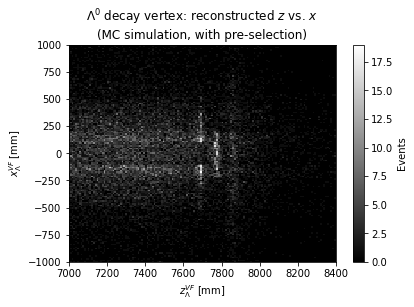

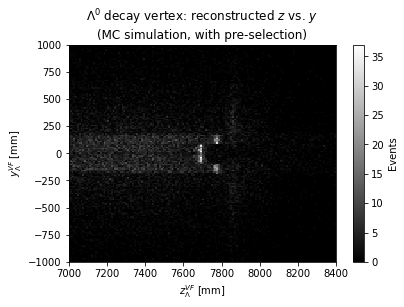

In [16]:
for comp_y in ['x', 'y']:
    plot_parameters = {
        'binning': 150,
        'range_x': [7000,8400],
        'range_y': [-1000,1000],
        'title': '$\Lambda^0$ decay vertex: reconstructed $z$ vs. $' + comp_y + '$',
        'label_x': '$z_\Lambda^{VF}$ [mm]',
        'label_y': '$' +  comp_y + '_\Lambda^{VF}$ [mm]',
        'file_name': 'Lambda_endvertex_z_vs_' + comp_y,
        'with_preselection': True,
        'show_title': show_titles,
        'black_and_white': bw,
    }
    
    all_or_preselection_hist2d(
        df_data['L_ENDVERTEX_Z'],
        df_data['L_ENDVERTEX_' + comp_y.upper()],
        **plot_parameters
    )

"Wow! Cool substructures!"

"Thanks. The T1 tracking station made them for me."

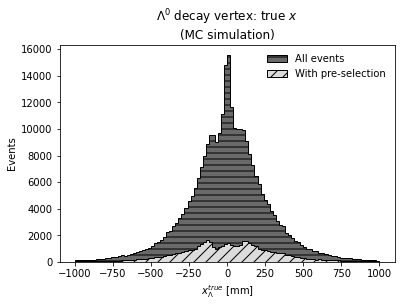

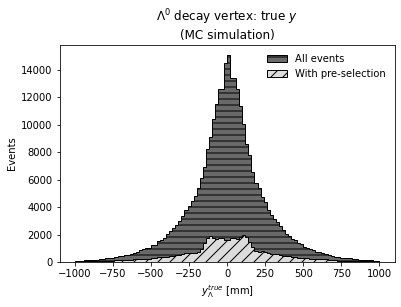

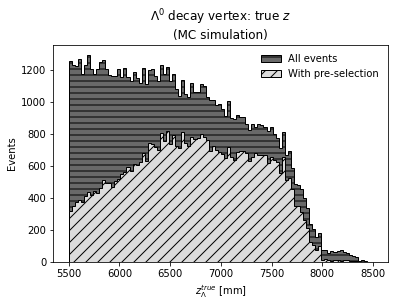

In [17]:
component_to_x_range = {
    'x': (-1000, 1000),
    'y': (-1000, 1000),
    'z': (5500, 8500)
}

for comp in ['x', 'y', 'z']:
    plot_parameters = {
        'binning': 100,
        'x_range': component_to_x_range[comp],
        'title': '$\Lambda^0$ decay vertex: true $' + comp + '$',
        'x_label': '$' +  comp + '_\Lambda^{true}$ [mm]',
        'file_name': 'Lambda_endvertex_' + comp + '_true',
        'zero_vline': False,
        'log_scale': False,
        'show_title': show_titles,
        'black_and_white': bw,
        'show_grid': show_grid,
        'show_no_cuts': show_no_cuts
    }

    all_vs_preselection_plot(
        df_data['MCTRUTH_L_ENDVERTEX_' + comp.upper()],
        **plot_parameters)

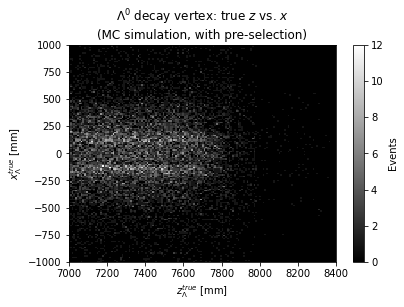

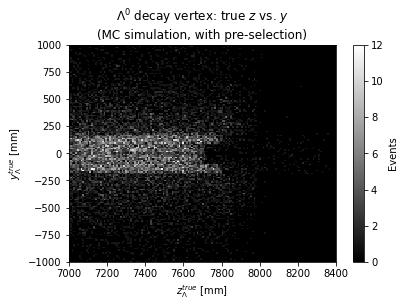

In [18]:
t_station_selection = (df_data['L_ENDVERTEX_Z'] >= 7000) & (df_data['L_ENDVERTEX_Z'] <= 8400)

for comp_y in ['x', 'y']:
    plot_parameters = {
        'binning': 150,
        'range_x': [7000,8400],
        'range_y': [-1000,1000],
        'title': '$\Lambda^0$ decay vertex: true $z$ vs. $' + comp_y + '$',
        'label_x': '$z_\Lambda^{true}$ [mm]',
        'label_y': '$' +  comp_y + '_\Lambda^{true}$ [mm]',
        'file_name': 'Lambda_endvertex_z_vs_' + comp_y + '_true',
        'with_preselection': True,
        'show_title': show_titles,
        'black_and_white': bw,
    }
    
    all_or_preselection_hist2d(
        df_data.loc[t_station_selection, 'MCTRUTH_L_ENDVERTEX_Z'],
        df_data.loc[t_station_selection, 'MCTRUTH_L_ENDVERTEX_' + comp_y.upper()],
        **plot_parameters
    )

They are *not* in the true data. Very sad. At least we don't have to worry about spin perturbation when interacting with the material.

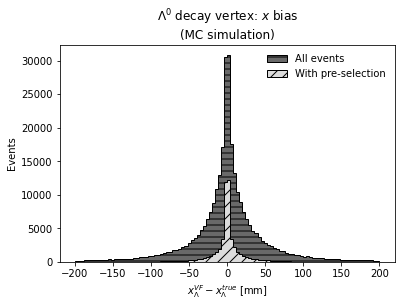

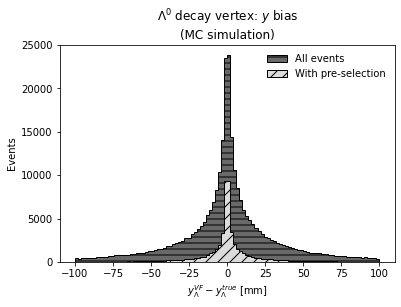

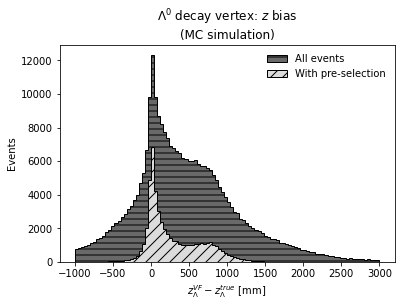

In [19]:
component_to_x_range = {
    'x': (-200, 200),
    'y': (-100, 100),
#    'z': (-1000, 8500)
    'z': (-1000, 3000)
}

for comp in ['x', 'y', 'z']:
    plot_parameters = {
        'binning': 100,
        'x_range': component_to_x_range[comp],
        'title': '$\Lambda^0$ decay vertex: $' + comp + '$ bias',
        'x_label': '$' +  comp + '_\Lambda^{VF} - ' + comp + '_\Lambda^{true}$ [mm]',
        'file_name': 'Lambda_endvertex_bias_' + comp,
        'zero_vline': False,
        'log_scale': False,
        'show_title': show_titles,
        'black_and_white': bw,
        'show_grid': show_grid,
        'show_no_cuts': show_no_cuts
    }

    all_vs_preselection_plot(
        df_data['L_ENDVERTEX_' + comp.upper()] - df_data['MCTRUTH_L_ENDVERTEX_' + comp.upper()],
        **plot_parameters)

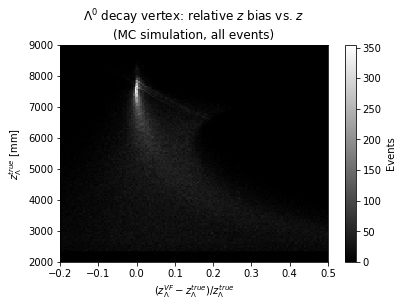

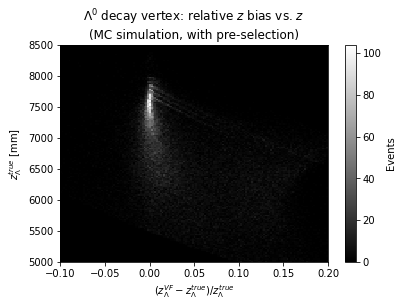

In [20]:
plot_parameters = {
    'binning': 150,
    'title': '$\Lambda^0$ decay vertex: relative $z$ bias vs. $z$',
    'label_x': '$(z_\Lambda^{VF} - z_\Lambda^{true})/z_\Lambda^{true}$',
    'label_y': '$z_\Lambda^{true}$ [mm]',
    'show_title': show_titles,
    'black_and_white': bw,
}

no_presel_parameters = {
    'with_preselection': False,
    'range_x': [-0.2,0.5],
    'range_y': [2000,9000],
    'file_name': 'Lambda_endvertex_z_relbias_vs_z_true_alldata'
}

with_presel_parameters = {
    'with_preselection': True,
    'range_x': [-0.1,0.2],
    'range_y': [5000,8500],
    'file_name': 'Lambda_endvertex_z_relbias_vs_z_true_presel'
}

all_or_preselection_hist2d(
    (df_data['L_ENDVERTEX_Z'] - df_data['MCTRUTH_L_ENDVERTEX_Z'])/df_data['MCTRUTH_L_ENDVERTEX_Z'],
    df_data['MCTRUTH_L_ENDVERTEX_Z'],
    **plot_parameters,
    **no_presel_parameters
)


all_or_preselection_hist2d(
    (df_data['L_ENDVERTEX_Z'] - df_data['MCTRUTH_L_ENDVERTEX_Z'])/df_data['MCTRUTH_L_ENDVERTEX_Z'],
    df_data['MCTRUTH_L_ENDVERTEX_Z'],
    **plot_parameters,
    **with_presel_parameters
)

## $\Lambda^0$ invariant mass

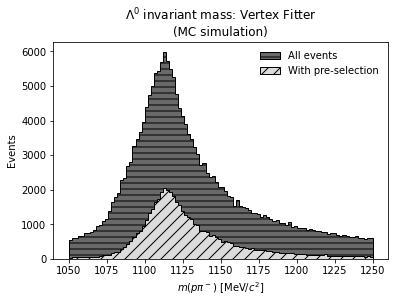

In [21]:
plot_parameters = {
    'binning': 100,
    'x_range': (1050,1250),
    'title': '$\Lambda^0$ invariant mass: Vertex Fitter',
    'x_label': '$m(p\pi^-)$ [MeV/$c^2$]',
    'file_name': 'Lambda_mass_VF',
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'show_no_cuts': show_no_cuts
}

all_vs_preselection_plot(
    df_data['L_M'],
    **plot_parameters)

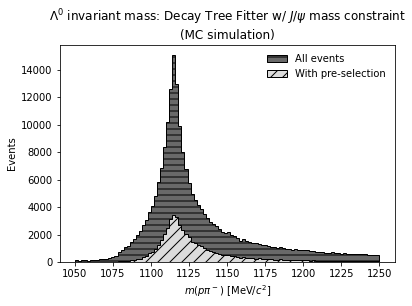

In [22]:
plot_parameters = {
    'binning': 100,
    'x_range': (1050,1250),
    'title': '$\Lambda^0$ invariant mass: Decay Tree Fitter w/ $J/\psi$ mass constraint',
    'x_label': '$m(p\pi^-)$ [MeV/$c^2$]',
    'file_name': 'Lambda_mass_DTF_FixJPsi',
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'show_no_cuts': show_no_cuts
}

all_vs_preselection_plot(
    df_data['DTF_FixJPsi_L_M'],
    **plot_parameters)

## $\Lambda^0$ vertex $\tilde\chi^2$

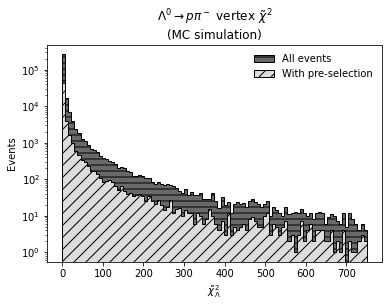

In [23]:
plot_parameters = {
    'binning': 100,
    'x_range': (0,750),
    'title': r'$\Lambda^0 \rightarrow p \pi^-$ vertex $\tilde\chi^2$',
    'x_label': r'$\tilde\chi^2_\Lambda$',
    'file_name': 'Lambda_chi2',
    'zero_vline': False,
    'log_scale': True,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'show_no_cuts': show_no_cuts
}

all_vs_preselection_plot(
    df_data['L_VFASPF_CHI2_VDOF'],
    **plot_parameters)

## $\Lambda^0_b$ vertex $\tilde\chi^2$

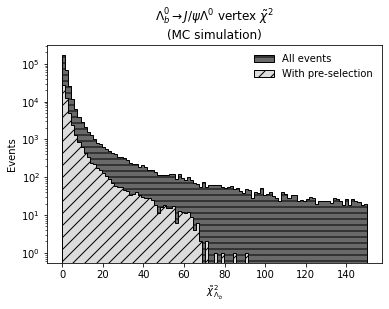

In [24]:
plot_parameters = {
    'binning': 100,
    'x_range': (0,150),
    'title': r'$\Lambda^0_b \rightarrow J/\psi \Lambda^0$ vertex $\tilde\chi^2$',
    'x_label': r'$\tilde\chi^2_{\Lambda_b}$',
    'file_name': 'Lambdab_chi2',
    'zero_vline': False,
    'log_scale': True,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'show_no_cuts': show_no_cuts
}

all_vs_preselection_plot(
    df_data['Lb_VFASPF_CHI2_VDOF'],
    **plot_parameters)

## Proton momentum

### Vertex Fitter

In [25]:
def plot_particle_momenta(
    particle_name_for_title: str,      ## e.g. Proton, Pion, $\Lambda^0$, ...
    particle_name_for_filename: str,   ## e.g. proton, pion, Lambda, ...
    particle_symbol_for_label: str,    ## e.g. \Lambda^0, \pi^-, ...
    particle_identifier_for_df: str,   ## e.g. L, p, pim, Lb, ...
    binning: int,
    component_to_x_range: dict,
    momentum_type: str,                ## VF or DTF
    zero_vline: bool = False,
    zero_vline_on: List[str] = [],
    log_scale: bool = False,
    show_title: bool = True,
    show_grid: bool = True,
    black_and_white: bool = False,
    scientific_notation: bool = False,
    legend_loc: str = 'best',
    legend_loc_on: List[str] = [],
    show_no_cuts: bool = True
) -> None:
    
    for comp in ['x', 'y', 'z']:
        if momentum_type == 'VF':
            feature = particle_identifier_for_df + '_P' + comp.upper()
            momentum_title = 'VF'
        elif momentum_type == 'DTF':
            feature = 'DTF_FixJPsi_' + particle_identifier_for_df + '_P' + comp.upper()
            momentum_title = 'DTF w/ $J/\psi$ m.c.'
        else:
            raise ValueError    
    
        plot_parameters = {
            'binning': binning,
            'x_range': component_to_x_range[comp],
            'title': particle_name_for_title + ' momentum (' + momentum_title + '): $' + comp + '$ component',
            'x_label': '$p_' +  comp + '^{VF} (' + particle_symbol_for_label + ')$ [MeV/$c$]',
            'file_name': particle_name_for_filename + '_momentum_' + momentum_type + '_' + comp,
            'zero_vline': zero_vline,
            'log_scale': log_scale,
            'show_title': show_title,
            'black_and_white': black_and_white,
            'show_grid': show_grid,
            'scientific_notation': scientific_notation,
            'legend_loc': legend_loc,
            'show_no_cuts': show_no_cuts
        }
        
        if comp in legend_loc_on:
            plot_parameters['legend_loc'] = legend_loc
            
        if comp in zero_vline_on:
            plot_parameters['zero_vline'] = zero_vline
        
        all_vs_preselection_plot(df_data[feature], **plot_parameters)    

In [26]:
def plot_particle_momenta_bias(
    particle_name_for_title: str,      ## e.g. Proton, Pion, $\Lambda^0$, ...
    particle_name_for_filename: str,   ## e.g. proton, pion, Lambda, ...
    particle_symbol_for_label: str,    ## e.g. \Lambda^0, \pi^-, ...
    particle_identifier_for_df: str,   ## e.g. L, p, pim, Lb, ...
    binning: int,
    component_to_x_range: dict,
    momentum_type: str,                ## VF or DTF
    zero_vline: bool = False,
    zero_vline_on: List[str] = [],
    log_scale: bool = False,
    show_title: bool = True,
    show_grid: bool = True,
    black_and_white: bool = False,
    scientific_notation: bool = False,
    legend_loc: str = 'best',
    legend_loc_on: List[str] = [],
    show_no_cuts: bool = True,
    relative_bias: bool = False
) -> None:
    
    for comp in ['x', 'y', 'z']:
        if momentum_type == 'VF':
            feature_reco = particle_identifier_for_df + '_P' + comp.upper()
            momentum_title = 'VF'
        elif momentum_type == 'DTF':
            feature_reco = 'DTF_FixJPsi_' + particle_identifier_for_df + '_P' + comp.upper()
            momentum_title = 'DTF w/ $J/\psi$ m.c.'
        else:
            raise ValueError
        
        
        x_label = (
            '$p_' +  comp + '^{' + momentum_type
            + '} (' + particle_symbol_for_label + ') - p_'
            + comp + '^{true} (' + particle_symbol_for_label + ')$ [MeV/$c$]'
        )
        
        if relative_bias:
            bias_in_filename = 'bias_rel'
            bias_in_title = 'relative bias'
            x_label = (
                '$(p_' +  comp + '^{' + momentum_type
                + '} (' + particle_symbol_for_label + ') - p_'
                + comp + '^{true} (' + particle_symbol_for_label + '))/'
                + 'p_' + comp + '^{true} (' + particle_symbol_for_label + ')$ [MeV/$c$]'
            )
        else:
            bias_in_filename = 'bias'
            bias_in_title = 'bias'
            x_label = (
                '$p_' +  comp + '^{' + momentum_type
                + '} (' + particle_symbol_for_label + ') - p_'
                + comp + '^{true} (' + particle_symbol_for_label + ')$ [MeV/$c$]'
            )
        
        plot_parameters = {
            'binning': binning,
            'x_range': component_to_x_range[comp],
            'title': particle_name_for_title + ' momentum (' + momentum_title + '): $' + comp + '$ ' + bias_in_title,
            'x_label': x_label,
            'file_name': particle_name_for_filename + '_momentum_' + bias_in_filename + '_' + momentum_type + '_' + comp,
            'log_scale': log_scale,
            'show_title': show_title,
            'black_and_white': black_and_white,
            'show_grid': show_grid,
            'scientific_notation': scientific_notation,
            'show_no_cuts': show_no_cuts
        }
        
        if comp in legend_loc_on:
            plot_parameters['legend_loc'] = legend_loc
            
        if comp in zero_vline_on:
            plot_parameters['zero_vline'] = zero_vline
            
        feature_true = 'MCTRUTH_' + particle_identifier_for_df + '_P' + comp.upper()
        
        if relative_bias:
            to_plot = (df_data[feature_reco] - df_data[feature_true])/df_data[feature_true]
        else:
            to_plot = df_data[feature_reco] - df_data[feature_true]
        
        all_vs_preselection_plot(to_plot, **plot_parameters)    

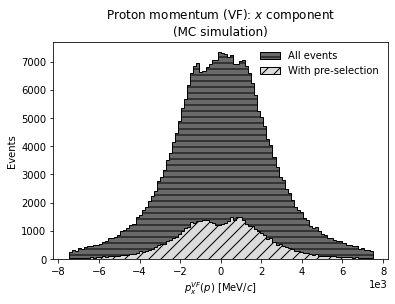

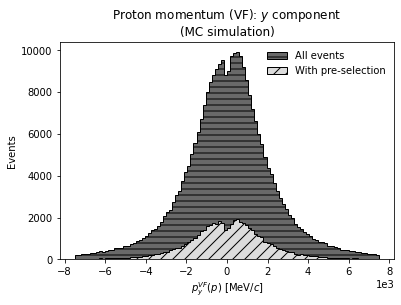

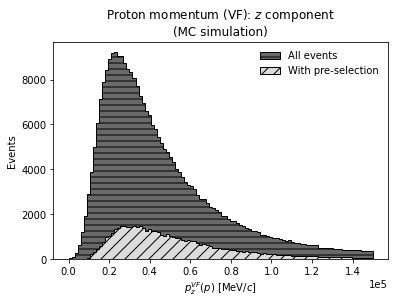

In [27]:
component_to_x_range = {
    'x': (-7.5e3, 7.5e3),
    'y': (-7.5e3, 7.5e3),
    'z': (0, 1.5e5)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Proton',
    'particle_name_for_filename': 'proton',
    'particle_symbol_for_label': 'p',
    'particle_identifier_for_df': 'p',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'VF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': True,
    'show_no_cuts': show_no_cuts    
}

plot_particle_momenta(**plot_parameters)

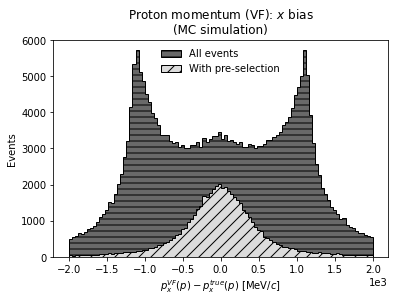

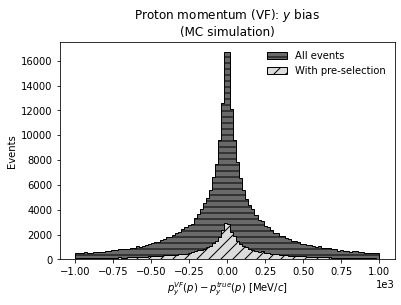

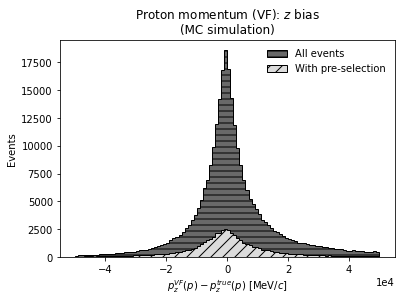

In [28]:
component_to_x_range = {
    'x': (-2e3, 2e3),
    'y': (-1e3, 1e3),
    'z': (-5e4, 5e4)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Proton',
    'particle_name_for_filename': 'proton',
    'particle_symbol_for_label': 'p',
    'particle_identifier_for_df': 'p',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'VF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': True,
    'show_no_cuts': show_no_cuts,
    'legend_loc': 'upper center',
    'legend_loc_on': ['x']
}

plot_particle_momenta_bias(**plot_parameters)

For a more in-depth look at the two "blobs" in the $p_x (p)$ distribution, check out the proton momenta anomaly study.

### Decay Tree Fitter (with $J/\psi$ mass constraint)

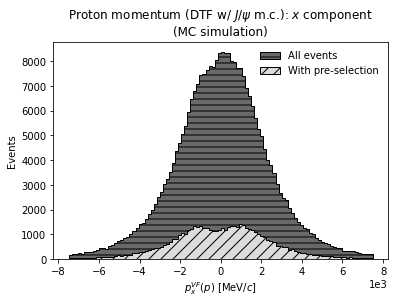

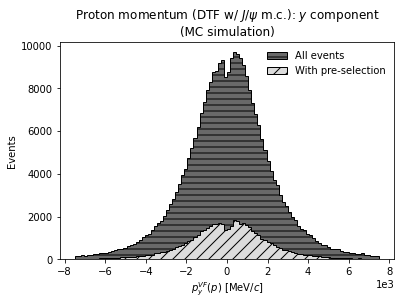

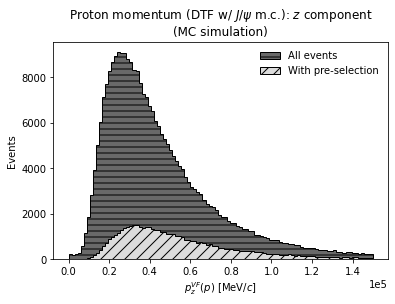

In [29]:
component_to_x_range = {
    'x': (-7.5e3, 7.5e3),
    'y': (-7.5e3, 7.5e3),
    'z': (0, 1.5e5)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Proton',
    'particle_name_for_filename': 'proton',
    'particle_symbol_for_label': 'p',
    'particle_identifier_for_df': 'p',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'DTF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': True,
    'show_no_cuts': show_no_cuts,
}

plot_particle_momenta(**plot_parameters)

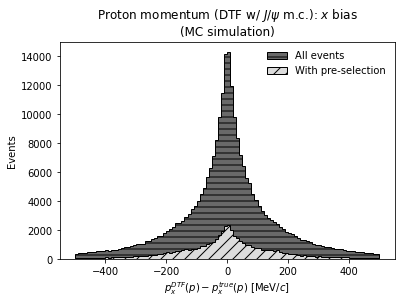

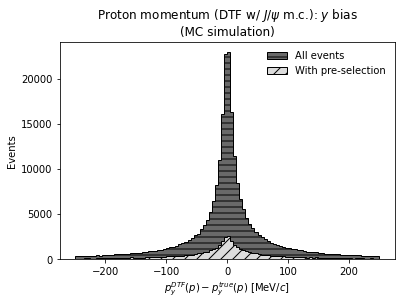

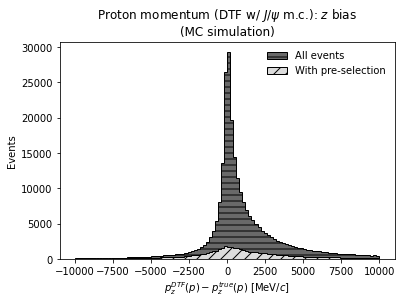

In [30]:
component_to_x_range = {
    'x': (-500, 500),
    'y': (-250, 250),
    'z': (-1e4, 1e4)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Proton',
    'particle_name_for_filename': 'proton',
    'particle_symbol_for_label': 'p',
    'particle_identifier_for_df': 'p',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'DTF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': False,
    'show_no_cuts': show_no_cuts,
}

plot_particle_momenta_bias(**plot_parameters)

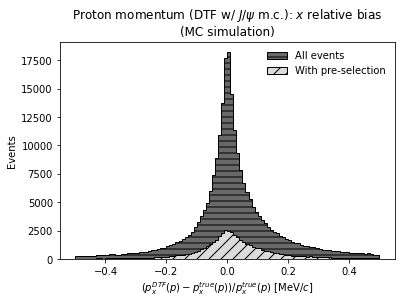

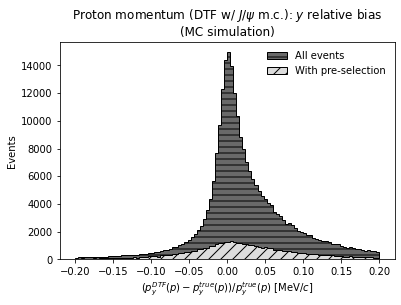

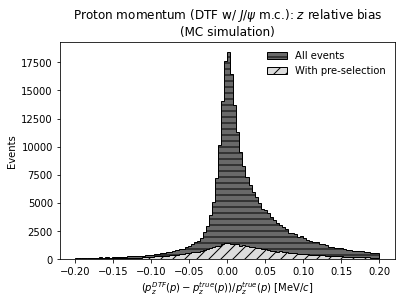

In [31]:
component_to_x_range = {
    'x': (-.5, .5),
    'y': (-.2, .2),
    'z': (-.2, .2)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Proton',
    'particle_name_for_filename': 'proton',
    'particle_symbol_for_label': 'p',
    'particle_identifier_for_df': 'p',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'DTF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': False,
    'show_no_cuts': show_no_cuts,
    'relative_bias': True
}

plot_particle_momenta_bias(**plot_parameters)

## Pion momentum
### Vertex Fitter

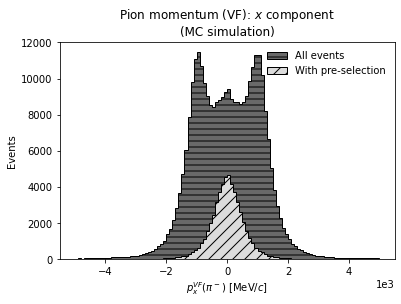

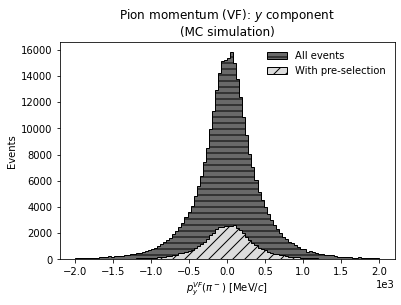

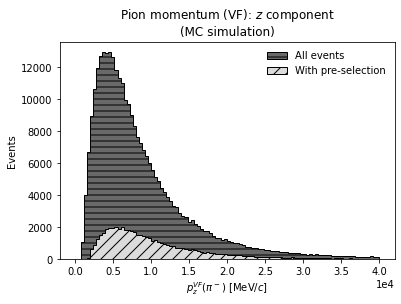

In [32]:
component_to_x_range = {
    'x': (-5e3, 5e3),
    'y': (-2e3, 2e3),
    'z': (0, 4e4)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Pion',
    'particle_name_for_filename': 'pion',
    'particle_symbol_for_label': '\pi^-',
    'particle_identifier_for_df': 'pim',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'VF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': True,
    'show_no_cuts': show_no_cuts    
}

plot_particle_momenta(**plot_parameters)

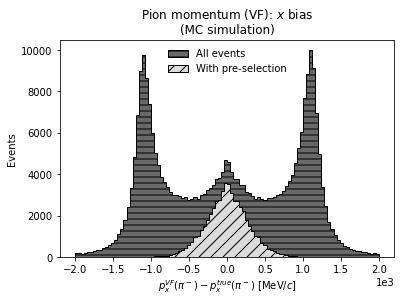

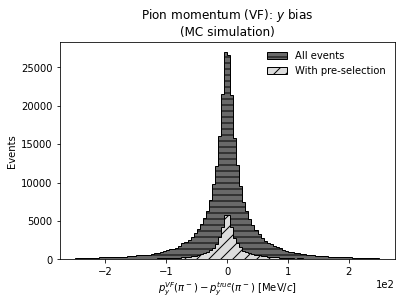

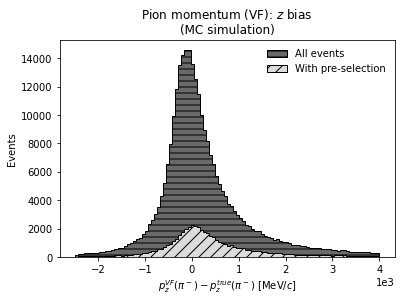

In [33]:
component_to_x_range = {
    'x': (-2e3, 2e3),
    'y': (-2.5e2, 2.5e2),
    'z': (-2.5e3, 4e3)
}
plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Pion',
    'particle_name_for_filename': 'pion',
    'particle_symbol_for_label': '\pi^-',
    'particle_identifier_for_df': 'pim',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'VF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': True,
    'show_no_cuts': show_no_cuts,
    'legend_loc': 'upper center',
    'legend_loc_on': ['x']
}

plot_particle_momenta_bias(**plot_parameters)

### Decay Tree Fitter (with $J/\psi$ mass constraint)

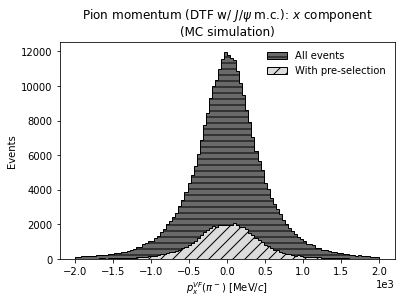

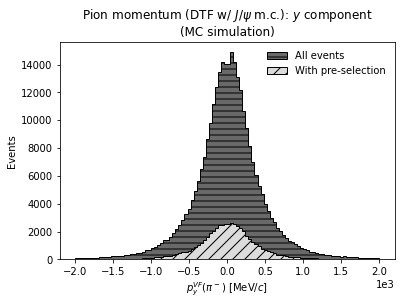

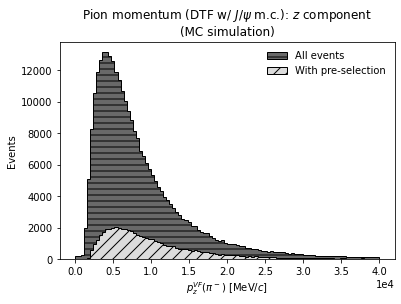

In [34]:
component_to_x_range = {
    'x': (-2e3, 2e3),
    'y': (-2e3, 2e3),
    'z': (0, 4e4)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Pion',
    'particle_name_for_filename': 'pion',
    'particle_symbol_for_label': '\pi^-',
    'particle_identifier_for_df': 'pim',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'DTF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': True,
    'show_no_cuts': show_no_cuts,
}

plot_particle_momenta(**plot_parameters)

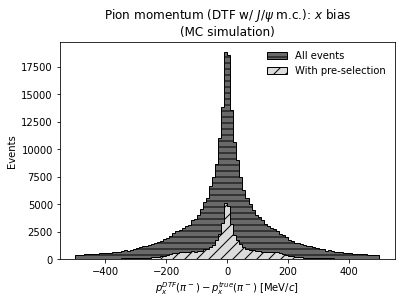

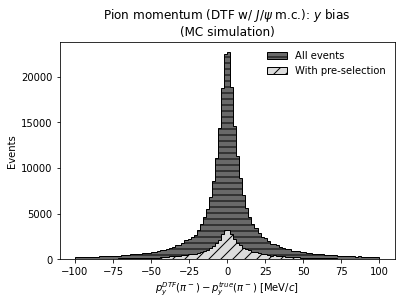

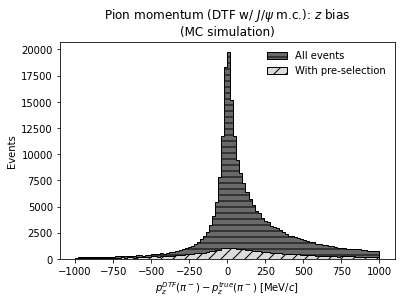

In [35]:
component_to_x_range = {
    'x': (-500, 500),
    'y': (-100, 100),
    'z': (-1000, 1000)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Pion',
    'particle_name_for_filename': 'pion',
    'particle_symbol_for_label': '\pi^-',
    'particle_identifier_for_df': 'pim',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'DTF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': False,
    'show_no_cuts': show_no_cuts,
}

plot_particle_momenta_bias(**plot_parameters)

## $\Lambda^0$ momentum
Composite particles have no MCTRUTH info and no DTF individual momenta. This is fine.
### Vertex Fitter

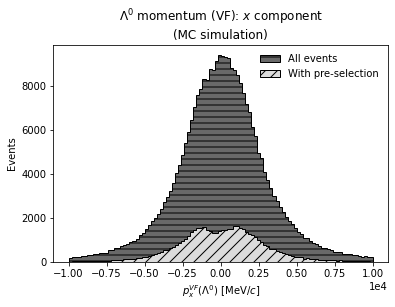

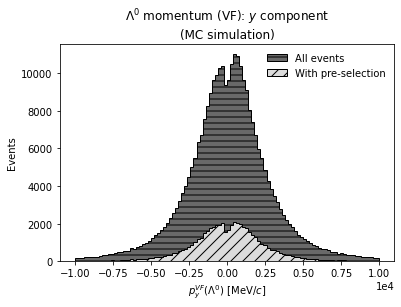

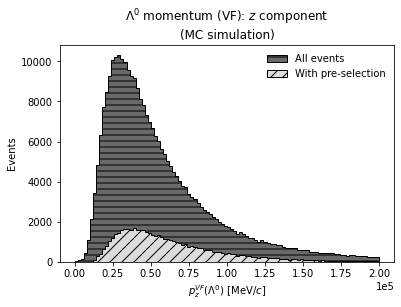

In [36]:
component_to_x_range = {
    'x': (-1e4, 1e4),
    'y': (-1e4, 1e4),
    'z': (0, 2e5)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': '$\Lambda^0$',
    'particle_name_for_filename': 'Lambda',
    'particle_symbol_for_label': '\Lambda^0',
    'particle_identifier_for_df': 'L',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'VF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': True,
    'show_no_cuts': show_no_cuts    
}

plot_particle_momenta(**plot_parameters)

## $\Lambda^0_b$ momentum
### Vertex Fitter

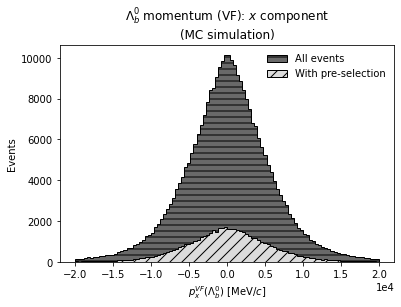

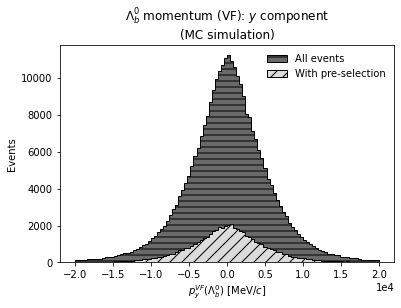

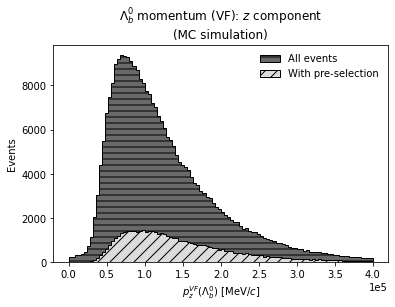

In [37]:
component_to_x_range = {
    'x': (-2e4, 2e4),
    'y': (-2e4, 2e4),
    'z': (0, 4e5)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': '$\Lambda^0_b$',
    'particle_name_for_filename': 'Lambdab',
    'particle_symbol_for_label': '\Lambda^0_b',
    'particle_identifier_for_df': 'Lb',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'VF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': True,
    'show_no_cuts': show_no_cuts    
}

plot_particle_momenta(**plot_parameters)